# YOLOv1 from scratch with PyTorch

https://arxiv.org/abs/1506.02640

### Imports

In [1]:
import torch
import torchvision.transforms as transforms
import torch.optim as optim
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import DataLoader
from model import YOLO
from dataset import YOLOv1Dataset
from loss import YOLOv1Loss
from utils import (
    load_checkpoint,
    ComposeDetectionTransforms,
    trainable_parameters,
)
from train import train_yolov1
from test import test_model

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.12 (you have 1.4.10). Upgrade using: pip install --upgrade albumentations


### Constants

In [2]:
LEARNING_RATE = 2e-5
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 8
WEIGHT_DECAY = 0
EPOCHS = 20
NUM_WORKERS = 6
PIN_MEMORY = True
LOAD_MODEL = False
LOAD_MODEL_FILE = "yolov1-20.pt"
LOAD_MODEL_EPOCH = 0
# https://www.kaggle.com/datasets/aladdinpersson/pascalvoc-yolo
IMG_DIR = "/data/Datasets/pascalvoc/images"
LABEL_DIR = "/data/Datasets/pascalvoc/labels"
TRAIN_CSV = "/data/Datasets/pascalvoc/train.csv"
TEST_CSV = "/data/Datasets/pascalvoc/test.csv"
SPLIT_SIZE = 7
NUM_BOXES = 2
NUM_CLASSES = 20
LINEAR_SIZE = 1024 # 4096 on original paper
IMAGE_SIZE = 448

### Initialization of the model

In [3]:
model = YOLO().to(DEVICE)
params = trainable_parameters(model)
print(f"Trainable parameters: {params}")
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
loss_fn = YOLOv1Loss(split_size=SPLIT_SIZE, num_boxes=NUM_BOXES, num_classes=NUM_CLASSES)

if LOAD_MODEL:
    load_checkpoint(torch.load(LOAD_MODEL_FILE), model, optimizer)

Layer 0: Conv with 3 input channels and 64 output channels
Layer 1: MaxPool2d with 64 input channels and 64 output channels
Layer 2: Conv with 64 input channels and 192 output channels
Layer 3: MaxPool2d with 192 input channels and 192 output channels
Layer 4: Conv with 192 input channels and 128 output channels
Layer 5: Conv with 128 input channels and 256 output channels
Layer 6: Conv with 256 input channels and 256 output channels
Layer 7: Conv with 256 input channels and 512 output channels
Layer 8: MaxPool2d with 512 input channels and 512 output channels
Layer 9: Conv with 512 input channels and 256 output channels
Layer 10: Conv with 256 input channels and 512 output channels
Layer 11: Conv with 512 input channels and 256 output channels
Layer 12: Conv with 256 input channels and 512 output channels
Layer 13: Conv with 512 input channels and 256 output channels
Layer 14: Conv with 256 input channels and 512 output channels
Layer 15: Conv with 512 input channels and 256 output ch

### Initialization of the training dataset/dataloader

In [4]:
transform = A.Compose(
    [
        A.LongestMaxSize(max_size=IMAGE_SIZE),
        A.PadIfNeeded(min_height=IMAGE_SIZE, min_width=IMAGE_SIZE, border_mode=0, value=[0, 0, 0]),
        A.Normalize(mean=[0, 0, 0], std=[1, 1, 1], max_pixel_value=255.0),
        ToTensorV2(),
    ],
    bbox_params=A.BboxParams(format="yolo", min_visibility=0.4, label_fields=[]),
)

train_dataset = YOLOv1Dataset(
    "/data/Datasets/pascalvoc/8examples.csv",
    transform=transform,
    img_dir=IMG_DIR,
    label_dir=LABEL_DIR,
    split_size=SPLIT_SIZE,
    num_boxes=NUM_BOXES,
    num_classes=NUM_CLASSES,
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    shuffle=True,
    drop_last=True,
)

### Model training

In [5]:
train_yolov1(model, train_loader, optimizer, loss_fn, DEVICE, EPOCHS, start_epoch=LOAD_MODEL_EPOCH, 
          split_size=SPLIT_SIZE, num_boxes=NUM_BOXES, num_classes=NUM_CLASSES)

100%|██████████| 1/1 [00:01<00:00,  1.54s/it, loss=629]

Epoch [0/20], Mean loss: 629.3477


Epoch [0/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.68it/s, loss=199]

Epoch [1/20], Mean loss: 198.6658


Epoch [1/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.66it/s, loss=125]

Epoch [2/20], Mean loss: 125.0713


Epoch [2/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.69it/s, loss=84.1]

Epoch [3/20], Mean loss: 84.1072


Epoch [3/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.76it/s, loss=59.2]

Epoch [4/20], Mean loss: 59.2193


Epoch [4/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.70it/s, loss=42.5]

Epoch [5/20], Mean loss: 42.5287


Epoch [5/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.61it/s, loss=31.6]

Epoch [6/20], Mean loss: 31.5790


Epoch [6/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.58it/s, loss=23.8]

Epoch [7/20], Mean loss: 23.8437


Epoch [7/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.65it/s, loss=18.3]

Epoch [8/20], Mean loss: 18.3431


Epoch [8/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.63it/s, loss=14.5]

Epoch [9/20], Mean loss: 14.4564


Epoch [9/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.62it/s, loss=11.7]

Epoch [10/20], Mean loss: 11.7107


Epoch [10/20], Train mAP: 0.0000
=> Saving checkpoint


100%|██████████| 1/1 [00:00<00:00,  1.64it/s, loss=9.6]

Epoch [11/20], Mean loss: 9.5987


Epoch [11/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.55it/s, loss=7.95]

Epoch [12/20], Mean loss: 7.9547


Epoch [12/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.67it/s, loss=6.61]

Epoch [13/20], Mean loss: 6.6136


Epoch [13/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.63it/s, loss=5.51]

Epoch [14/20], Mean loss: 5.5106


Epoch [14/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.58it/s, loss=4.57]

Epoch [15/20], Mean loss: 4.5659


Epoch [15/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.58it/s, loss=3.75]

Epoch [16/20], Mean loss: 3.7462


Epoch [16/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.70it/s, loss=3.05]

Epoch [17/20], Mean loss: 3.0488


Epoch [17/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.58it/s, loss=2.51]

Epoch [18/20], Mean loss: 2.5140


Epoch [18/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.62it/s, loss=2.1]

Epoch [19/20], Mean loss: 2.0961


Epoch [19/20], Train mAP: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.63it/s, loss=1.76]

Epoch [20/20], Mean loss: 1.7550


Epoch [20/20], Train mAP: 0.0000
=> Saving checkpoint


### Initialization of the testing dataset/dataloader

In [6]:
test_dataset = YOLOv1Dataset(
    "/data/Datasets/pascalvoc/test.csv",
    transform=transform,
    img_dir=IMG_DIR,
    label_dir=LABEL_DIR,
    split_size=SPLIT_SIZE,
    num_boxes=NUM_BOXES,
    num_classes=NUM_CLASSES,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    shuffle=True,
    drop_last=True,
)

### Plot some predictions on the test dataset

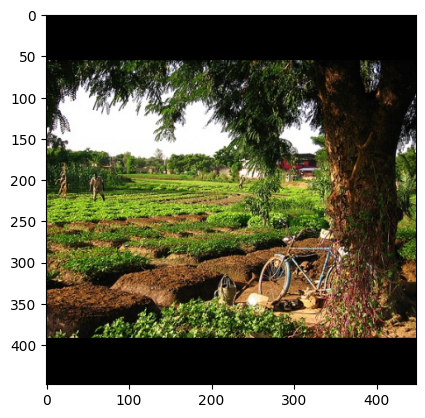

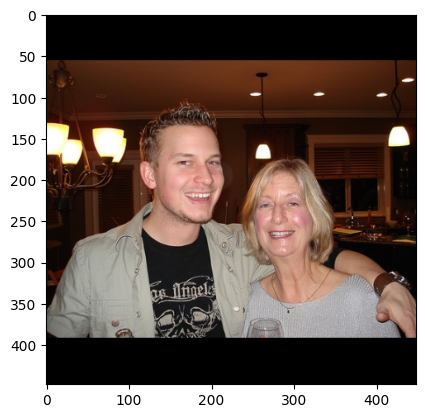

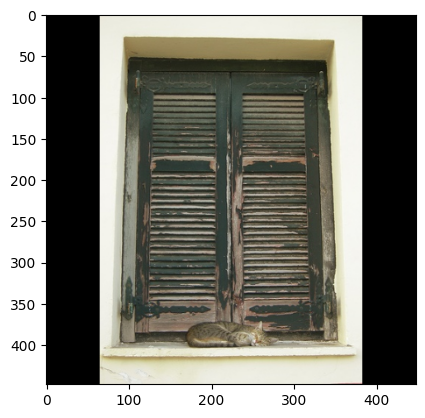

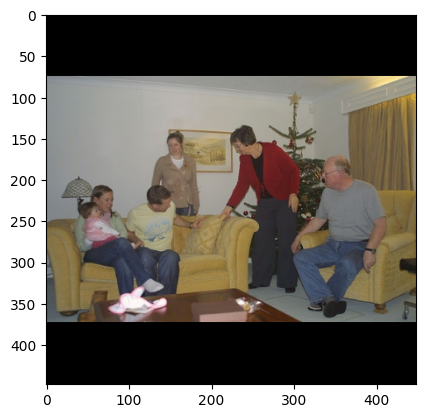

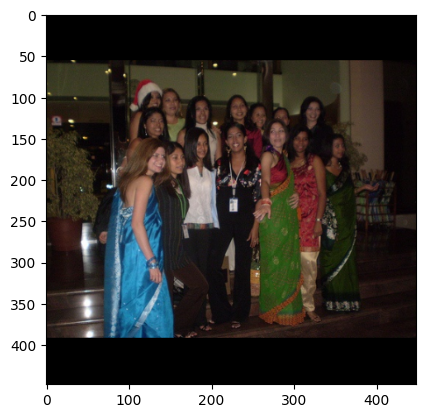

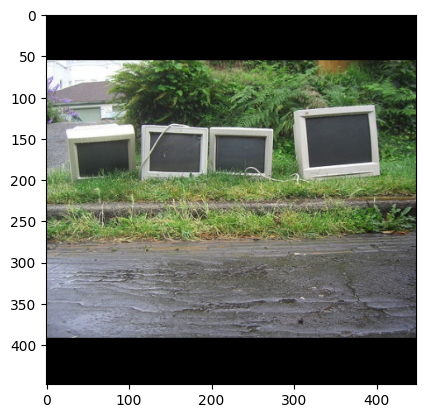

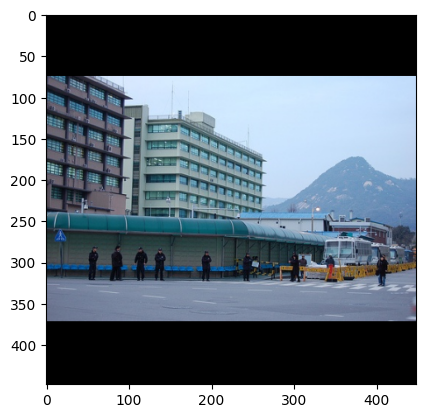

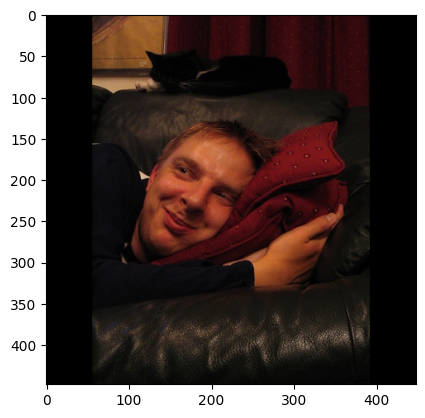

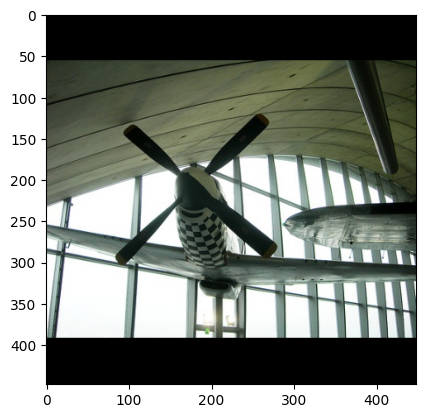

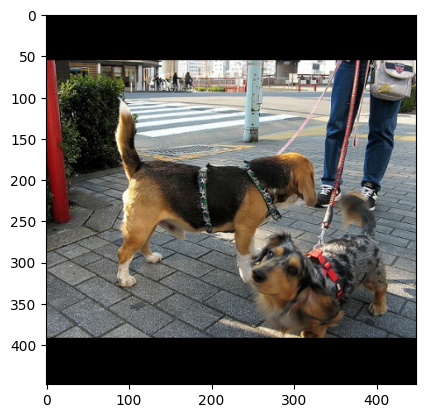

In [7]:
test_model(10, model, test_loader, DEVICE, split_size=SPLIT_SIZE, num_boxes=NUM_BOXES, num_classes=NUM_CLASSES)